In [1]:
import os
import numpy as np
import scipy.io.wavfile as wf
import matplotlib.pyplot as plt
import librosa
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\heera\Desktop\Dissertation\Data Physionet\traindata\merged.csv')

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,0.1
0,-577.74457,116.68117,82.454210,40.931873,7.485605,-7.887007,-4.491601,10.008358,24.508472,30.438593,...,5.994569,5.839570,3.671601,0.848826,-1.004319,-1.004396,0.530715,2.398161,3.331668,1
1,-628.81630,136.51126,100.357864,56.209590,19.551243,0.428206,-0.259094,10.158183,21.104572,24.655876,...,3.507886,2.841200,1.227278,-0.146953,-0.405241,0.449801,1.629177,2.186590,1.692338,1
2,-601.18340,77.22223,61.623146,42.221630,25.632828,16.337782,15.002048,18.738730,23.003593,24.039800,...,2.748103,2.922751,2.290715,1.166961,0.225971,0.042497,0.699116,1.713670,2.332496,1
3,-562.58900,88.77356,71.557740,49.522438,29.541950,16.664858,12.350879,14.427670,18.631382,20.879950,...,0.984788,1.662023,2.113323,2.125078,1.752352,1.235468,0.835051,0.692907,0.788556,1
4,-489.47345,65.72582,57.030285,45.383488,33.820340,24.795256,19.436210,17.373821,17.174334,17.152473,...,2.122123,2.094586,2.164926,2.183312,2.057845,1.794090,1.474256,1.199110,1.032410,1


In [4]:
df = df.rename(columns={"0.1": "labels"})

In [5]:
df["labels"].value_counts()

0    2575
1     665
Name: labels, dtype: int64

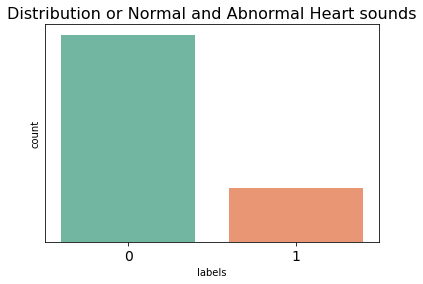

In [6]:
import seaborn as sns
plt.title("Distribution or Normal and Abnormal Heart sounds",fontsize= 16)
plt.xticks(fontsize=14,rotation=0)
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
plt.yticks([])
sns.countplot(x='labels',data=df,palette="Set2")
plt.show()
# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     ax.text(x+width/2, 
#             y+height/2, 
#             '{:.0f}'.format(height), 
#             horizontalalignment='center', 
#             verticalalignment='center')


# Split the Dataset and balance the y variable

In [7]:
### Split the dataset into independent and dependent dataset


In [8]:
X = df.iloc[:,0:40]
# y = df["class"]

In [9]:
X.shape

(3240, 40)

In [10]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-577.74457,116.68117,82.454210,40.931873,7.485605,-7.887007,-4.491601,10.008358,24.508472,30.438593,...,3.970105,5.994569,5.839570,3.671601,0.848826,-1.004319,-1.004396,0.530715,2.398161,3.331668
1,-628.81630,136.51126,100.357864,56.209590,19.551243,0.428206,-0.259094,10.158183,21.104572,24.655876,...,2.601242,3.507886,2.841200,1.227278,-0.146953,-0.405241,0.449801,1.629177,2.186590,1.692338
2,-601.18340,77.22223,61.623146,42.221630,25.632828,16.337782,15.002048,18.738730,23.003593,24.039800,...,2.034146,2.748103,2.922751,2.290715,1.166961,0.225971,0.042497,0.699116,1.713670,2.332496
3,-562.58900,88.77356,71.557740,49.522438,29.541950,16.664858,12.350879,14.427670,18.631382,20.879950,...,0.486486,0.984788,1.662023,2.113323,2.125078,1.752352,1.235468,0.835051,0.692907,0.788556
4,-489.47345,65.72582,57.030285,45.383488,33.820340,24.795256,19.436210,17.373821,17.174334,17.152473,...,2.368080,2.122123,2.094586,2.164926,2.183312,2.057845,1.794090,1.474256,1.199110,1.032410


In [11]:
y = df[["labels"]]

In [12]:
y.shape

(3240, 1)

# Without balancing the dataset

In [13]:
from sklearn.model_selection import train_test_split
A_train,A_test,b_train,b_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Linear SVC without hyperparameter tuning

In [14]:
# from sklearn import svm
from sklearn.svm import SVC  
from sklearn.metrics import classification_report
model = SVC(kernel='rbf', random_state=0)   # SVC Model
model.fit(A_train, b_train) 
b_pred = model.predict(A_test)
print('SVM')
print('---------------------')
print(classification_report(b_test, b_pred))
print('')


C:\Users\heera\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM
---------------------
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       526
           1       0.00      0.00      0.00       122

    accuracy                           0.81       648
   macro avg       0.41      0.50      0.45       648
weighted avg       0.66      0.81      0.73       648




C:\Users\heera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heera\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# We can see that as data is imbalanced it gives biased results

# Using SMOTE Algorithm to balance data

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=40)
X_sm, y_sm = sm.fit_resample(X, y)

In [16]:
X_sm.shape

(5150, 40)

In [17]:
y_sm.shape

(5150, 1)

In [18]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=0)


# Linear SVC without hyperparameter tuning

In [19]:
from sklearn import svm
from sklearn.svm import SVC  
model = SVC(kernel='rbf', random_state=0)   # SVC Model
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print('SVM')
print('---------------------')
print(classification_report(y_test, y_pred))
print('')


C:\Users\heera\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM
---------------------
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       526
           1       0.71      0.83      0.77       504

    accuracy                           0.75      1030
   macro avg       0.76      0.75      0.75      1030
weighted avg       0.76      0.75      0.75      1030




# SVM with Hyperparameter tuning

In [20]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0,0.01,0.1,0.8,1,1.2,10], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf'] } 
  
grid = GridSearchCV(svm.SVC(random_state=0), param_grid,verbose=1,n_jobs=-1,cv=10)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

Fitting 10 folds for each of 35 candidates, totalling 350 fits


C:\Users\heera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx"

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01, random_state=0)
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       526
           1       0.94      0.97      0.96       504

    accuracy                           0.96      1030
   macro avg       0.96      0.96      0.96      1030
weighted avg       0.96      0.96      0.96      1030



In [21]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, grid_predictions))

[[497  29]
 [ 16 488]]


In [22]:
# Confusion matrix for test  data

C:\Users\heera\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


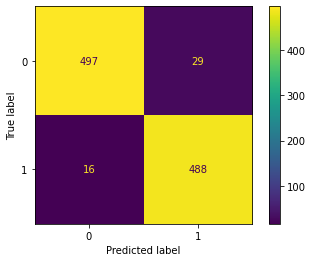

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid,X_test, y_test)  
plt.show()

In [25]:
df_val = pd.read_csv('C:/Users/heera/Desktop/Dissertation/Data Physionet/validation/merged_val.csv')


In [26]:
df_val.head() 

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,0.1
0,-577.74457,116.68117,82.454210,40.931873,7.485605,-7.887007,-4.491601,10.008358,24.508472,30.438593,...,5.994569,5.839570,3.671601,0.848826,-1.004319,-1.004396,0.530715,2.398161,3.331668,1
1,-628.81630,136.51126,100.357864,56.209590,19.551243,0.428206,-0.259094,10.158183,21.104572,24.655876,...,3.507886,2.841200,1.227278,-0.146953,-0.405241,0.449801,1.629177,2.186590,1.692338,1
2,-601.18340,77.22223,61.623146,42.221630,25.632828,16.337782,15.002048,18.738730,23.003593,24.039800,...,2.748103,2.922751,2.290715,1.166961,0.225971,0.042497,0.699116,1.713670,2.332496,1
3,-562.58900,88.77356,71.557740,49.522438,29.541950,16.664858,12.350879,14.427670,18.631382,20.879950,...,0.984788,1.662023,2.113323,2.125078,1.752352,1.235468,0.835051,0.692907,0.788556,1
4,-489.47345,65.72582,57.030285,45.383488,33.820340,24.795256,19.436210,17.373821,17.174334,17.152473,...,2.122123,2.094586,2.164926,2.183312,2.057845,1.794090,1.474256,1.199110,1.032410,1


In [27]:
df_val= df_val.rename(columns={"0.1": "labels"})

In [28]:
df_val["labels"].value_counts()

1    151
0    150
Name: labels, dtype: int64

In [29]:
Xv = df_val.iloc[:,0:40]
# y = df["class"]

In [30]:
yv= df_val[["labels"]]

In [31]:
yv.shape

(301, 1)

In [32]:
X.shape

(3240, 40)

In [33]:
from sklearn.model_selection import train_test_split
X_train = X
y_train =y
l_test =Xv
m_test =yv

In [34]:
# Validation Accuracy
grid.score(l_test.values, m_test.values)

C:\Users\heera\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9867109634551495

In [35]:
#Test Accuracy
grid.score(X_test.values, y_test.values)

C:\Users\heera\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9563106796116505

In [36]:
# Confusin matrix for validation data


C:\Users\heera\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


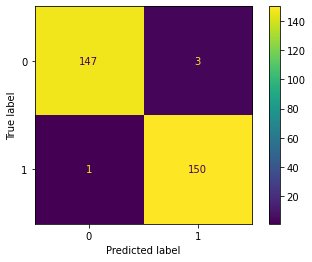

In [37]:
plot_confusion_matrix(grid,l_test, m_test)  
plt.show()

# 5 Fold cross validation

In [38]:
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

In [39]:
dataset = pd.concat([df, df_val])

In [40]:
dataset.value_counts()

0           1           2           3          4          5           6           7          8          9          10         11         12          13          14         15         16         17         18         19         20         21         22         23         24        25        26         27         28         29         30         31         32         33        34         35         36         37         38         39         labels
-769.55676  138.452220  107.299640  67.536960  31.606808   8.432062    0.287191   3.003927   9.060970   11.771116  8.391644   0.722520   -6.784737   -10.058901  -7.784902  -1.906820  3.795021   6.042208   3.893194   -0.921731  -5.213430  -6.262261  -3.316064   2.128430  7.297077  9.709415   8.436174   4.403301  -0.300409  -3.612047  -4.487105  -3.212341  -0.990804  0.856485   1.584437   1.270859   0.576312   0.239978   0.627463   1.557677  1         2
-555.07166  108.996550  76.340800   37.841454  8.742563   -1.908288    5.051618   20.603024  

In [41]:
Xa = dataset.iloc[:,0:40]
# y = df["class"]

In [42]:
ya = dataset[["labels"]]

In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=40)
X_sma, y_sma = sm.fit_resample(Xa, ya)

In [44]:
X_traina,X_testa,y_traina,y_testa=train_test_split(X_sma,y_sma,test_size=0.2,random_state=0)


In [47]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    grid.fit(X_train, y_train)
    scores.append(grid.score(X_test, y_test))

Train Index:  [   1    2    3 ... 3237 3238 3239] 

Test Index:  [   0   14   17   26   30   32   33   44   45   51   52   63   70   76
   93  102  120  134  139  144  149  152  170  173  174  178  179  183
  184  192  194  203  211  214  218  229  239  240  251  254  256  257
  263  270  279  289  291  298  299  309  314  321  322  325  331  332
  346  354  387  411  414  416  433  438  442  449  450  457  463  478
  479  485  486  495  501  506  507  527  528  538  554  568  581  599
  602  605  610  611  612  655  665  670  679  691  693  705  729  746
  756  765  772  785  789  794  803  811  829  839  844  867  871  881
  887  927  942  944  945  962  969  978  990  999 1003 1006 1017 1027
 1034 1042 1044 1052 1053 1057 1064 1084 1108 1116 1117 1127 1161 1173
 1181 1188 1192 1210 1221 1244 1255 1258 1264 1270 1278 1283 1298 1309
 1313 1317 1330 1336 1338 1359 1362 1366 1373 1381 1404 1412 1419 1421
 1427 1429 1444 1447 1451 1472 1474 1483 1491 1502 1503 1509 1510 1518
 1554 1556 1

C:\Users\heera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx"

NameError: name 'scores' is not defined

In [49]:
from sklearn.model_selection import cross_val_score

In [51]:
cross_val_score(grid, X_sma, y_sma, cv=5)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


C:\Users\heera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx"

Fitting 10 folds for each of 35 candidates, totalling 350 fits


C:\Users\heera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx"

Fitting 10 folds for each of 35 candidates, totalling 350 fits


C:\Users\heera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx"

Fitting 10 folds for each of 35 candidates, totalling 350 fits


C:\Users\heera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx"

Fitting 10 folds for each of 35 candidates, totalling 350 fits


C:\Users\heera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\heera\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx"

array([0.79908257, 0.98165138, 0.99449541, 0.99082569, 0.96330275])

In [53]:
a= np.array([0.79908257, 0.98165138, 0.99449541, 0.99082569, 0.96330275])

In [54]:
np.mean(a)

0.94587156